In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%cd ..
from src.multicropdataset import MultiCropDatasetAlt

/mnt/SSD_Data/active_projects/swav


In [3]:
import numpy as np
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader

In [4]:
dataset = MultiCropDatasetAlt(
    "/data/Flicker8k_Dataset/",
    # "/data/pretrain_dataset/",
    [224, 96],
    [2, 6],
    [0.14, 0.05],
    [1., 0.14],
)
len(dataset)

8091

In [5]:
assert len(dataset[0]) == 8

In [6]:
MEAN = np.array([0.485, 0.456, 0.406])[:, np.newaxis, np.newaxis]
STD = np.array([0.228, 0.224, 0.225])[:, np.newaxis, np.newaxis]
def unnormalize(batch):
    return (batch * STD + MEAN) * 255.

torch.Size([16, 3, 224, 224])


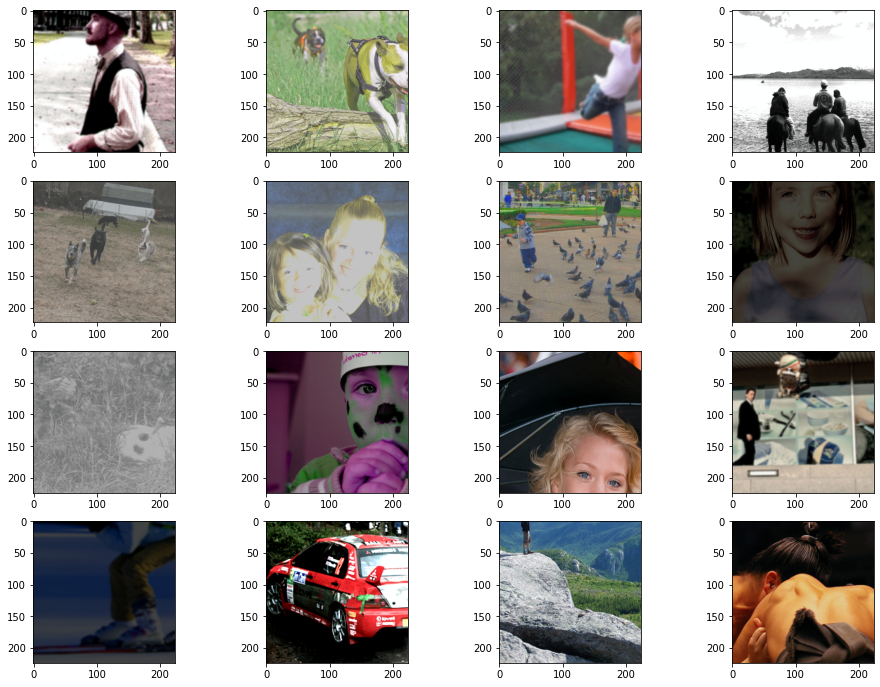

In [7]:
loader = DataLoader(dataset, batch_size=16, shuffle=True)
batch = next(iter(loader))[0]
print(batch.size())
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
count=0
for row in ax:
    for col in row:
        col.imshow(
            unnormalize(batch[count].numpy()).astype(np.uint8).transpose(1, 2, 0)
        )
        count += 1
plt.show()

torch.Size([16, 3, 96, 96])


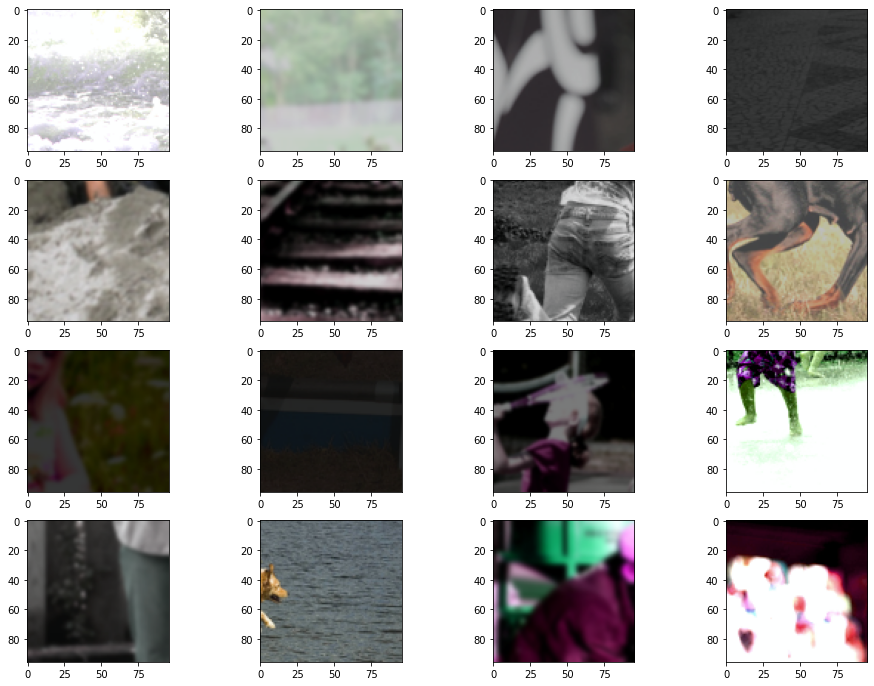

In [8]:
loader = DataLoader(dataset, batch_size=16, shuffle=True)
batch = next(iter(loader))[2]
print(batch.size())
fig, ax = plt.subplots(nrows=4, ncols=4, figsize=(16, 12))
count=0
for row in ax:
    for col in row:
        col.imshow(
            unnormalize(batch[count].numpy()).astype(np.uint8).transpose(1, 2, 0)
        )
        count += 1
plt.show()